In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from rnaseq import subset_rmats_junctioncountonly as subset
import pandas as pd
import pybedtools as bt
import glob
import os
from tqdm import tnrange, tqdm_notebook

In [2]:
all_positive = glob.glob('/projects/ps-yeolab3/bay001/maps/current_annotations/se/*.positive.txt')
all_negative = glob.glob('/projects/ps-yeolab3/bay001/maps/current_annotations/se/*.negative.txt')

all_jxc = all_positive + all_negative

In [3]:
bars = 3

def create_merged_df_for_boxplot(samples, o, e='se'):
    progress = tnrange(len(samples))
    merged = pd.DataFrame(index=range(1,4))

    for i in samples:
        df = subset.run_subset_rmats_junctioncountonly(i, o, e)
        if df.shape[0] > 100:
            df['num_overlapping'] = df.apply(lambda x: len(str(x['name']).split(',')), axis=1)
            df['num_toplot'] = df['num_overlapping'].apply(lambda x: bars if x > bars else x)
            percentages = pd.DataFrame(df['num_toplot'].value_counts().div(df['num_toplot'].value_counts().sum()))
            percentages.columns = [os.path.basename(i)]
            """.replace(
                '-SE.MATS.JunctionCountOnly.positive.txt','').replace(
                '-SE.MATS.JunctionCountOnly.negative.txt','')
                                  ]"""
            merged = pd.merge(merged, percentages, how='left', left_index=True, right_index=True)
        progress.update(1)
    return merged.T

o = '/projects/ps-yeolab3/bay001/tmp/test.jxc'
merged = create_merged_df_for_boxplot(all_jxc, o)

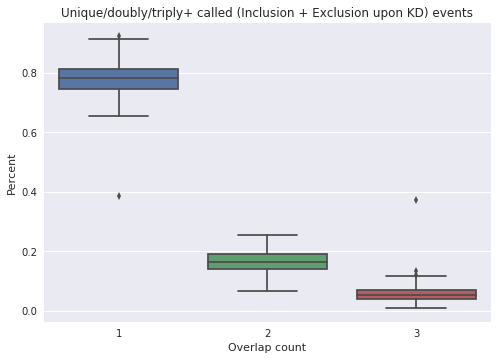

In [7]:
sns.boxplot(merged)
plt.title("Unique/doubly/triply+ called (Inclusion + Exclusion upon KD) events")
plt.ylabel("Percent")
plt.xlabel("Overlap count")

# find some examples
- AQR seems like an outlier

In [14]:
merged[3].sort_values(ascending=False).head(25)

AQR-BGKLV38-K562-SE.MATS.JunctionCountOnly.negative.txt         0.372177
AQR-BGKLV38-K562                                                0.133174
PUF60-BGKLV25-K562-SE.MATS.JunctionCountOnly.negative.txt       0.119500
TARDBP-LV11-K562-SE.MATS.JunctionCountOnly.negative.txt         0.117268
PUS1-BGKLV32-K562-SE.MATS.JunctionCountOnly.negative.txt        0.110988
SRFBP1-BGHLV37-HepG2-SE.MATS.JunctionCountOnly.negative.txt     0.107928
EWSR1-BGHLV31-HepG2-SE.MATS.JunctionCountOnly.negative.txt      0.105516
EIF4A3-LV08-K562-SE.MATS.JunctionCountOnly.negative.txt         0.104096
RBM22-BGHLV37-HepG2-SE.MATS.JunctionCountOnly.negative.txt      0.103359
APOBEC3C-BGKLV25-K562-SE.MATS.JunctionCountOnly.negative.txt    0.102941
PRPF8-BGKLV19-K562-SE.MATS.JunctionCountOnly.negative.txt       0.102851
AKAP8L-BGHLV31-HepG2                                            0.102804
SF3A3-BGHLV33-HepG2-SE.MATS.JunctionCountOnly.negative.txt      0.101983
SF3A3-BGKLV34-K562                                 

In [24]:

wd = '/projects/ps-yeolab3/bay001/maps/current_annotations/se/'
i = os.path.join(wd,'PRPF8-BGKLV19-K562-SE.MATS.JunctionCountOnly.negative.txt')
o = '/projects/ps-yeolab3/bay001/tmp/test.jxc'
annotation_df = subset.run_subset_rmats_junctioncountonly(i, o, e)
annotation_df.head()

,chrom,start,end,name
0,chr1,1154013,1158623,"593,658,700,712,718"
1,chr1,1250998,1255835,1452
2,chr1,1422048,1424583,514
3,chr1,1684499,1685722,"436,223,196"
4,chr1,1770677,1822258,1185
